<center> 
<h1>Classification of flower species </h1>
</center>

The Iris dataset is a classic dataset from the 1930s. this dataset is also considered one of the first modern examples of statistical classification.
The Iris flowers can be identified by their morphology. 

The following are the four attributes describing each plant :

* Sepal length
* Sepal width
* Petal length
* Petal width

the dataset has three species :

* Setosa 
* Versicolor
* Virginica


<img src="images/irises.png">

### loading the iris dataset

In [248]:
from sklearn.datasets import load_iris

iris = load_iris()


In [249]:
# print the first instances of the data

print(iris.data[:5])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]]


In [250]:
# print the names of the features 

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [251]:
# print the names of the each species

print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [252]:
# print the species of each instance 
# 0 = setosa,
#1 = versicolor
# 2 = virginica

print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


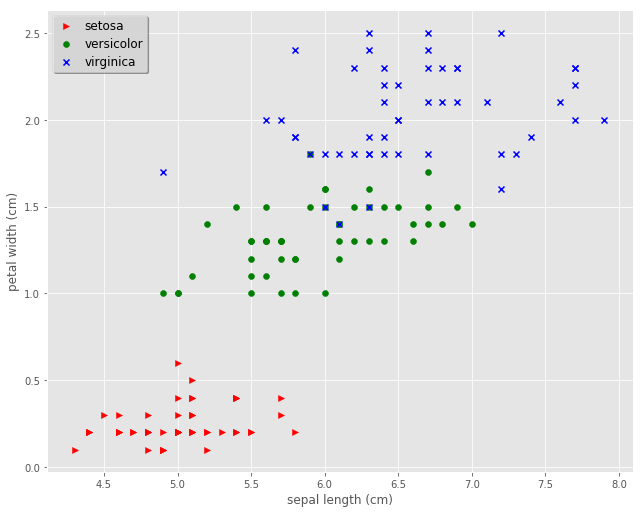

In [253]:
# visualization of the data points 

from matplotlib import pyplot as plt
plt.style.use('ggplot')

features = iris.data
feature_names = iris.feature_names
target = data.target

fig, ax = plt.subplots()
fig.set_size_inches(10.5, 8.5)


for t,marker,c, label in zip(range(3),">ox","rgb", ['setosa', 'versicolor' ,'virginica']):
    ax.scatter(features[target == t,0], features[target == t,3], marker=marker, c=c, label = label)

    
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('petal width (cm)')

legend = ax.legend(loc='upper left', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(10)  
    
plt.show()

### Data types and shape 

In [254]:
# checking the data type for features and target 

print(type(iris.target))
print(type(iris.data))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [255]:
# checking the shape of the features (number of observations, number of features)
# 150 observation
# 4 features

print(iris.data.shape)


(150, 4)


In [256]:
# checking the shape of the target (number of observations)
# 150 observation

print(iris.target.shape)

(150,)


### Split the data to train / test 

In [257]:
from sklearn.cross_validation import train_test_split

X = iris.data
y = iris.target

# split X & y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(105, 4) (45, 4)
(105,) (45,)


### Training machine learning models for classification 

#### Logistic Regression

In [258]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()

# training the model with the training data set 

logistic_model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluate the logistic regression model using the testing accuracy 

In [259]:
from sklearn.metrics import accuracy_score
# predict the response for testing set 

y_prediction = logistic_model.predict(X_test)

#compare actual target values with the predicted values 

print(accuracy_score(y_test, y_prediction))

1.0


#### K Nearest Neighbors (KNN)

In [260]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors = 1)

# training the model using the trainig data

knn_1.fit(X_train,y_train)

# predict the iris specie for new unseen 

knn_1.predict(X_new)


array([2, 0])

In [261]:
# change the number of neighbors (k = 5) 
knn_5 = KNeighborsClassifier(n_neighbors = 5)

# training the model 

knn_5.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Evaluate the KNN model using the testing accuracy 

In [262]:
# predict the response for testing set 

y_prediction = knn_1.predict(X_test)

#compare actual target values with the predicted values 

print('the accuracy of KNN with 1 neighbor is : ' , accuracy_score(y_test, y_prediction))

the accuracy of KNN with 1 neighbor is :  0.955555555556


In [263]:
# predict the response for testing set 

y_prediction = knn_5.predict(X_test)

#compare actual target values with the predicted values 

print('the accuracy of KNN with 5 neighbor is : ' , accuracy_score(y_test, y_prediction))

the accuracy of KNN with 5 neighbor is :  0.955555555556


### finding the best value for K for a better accuracy 

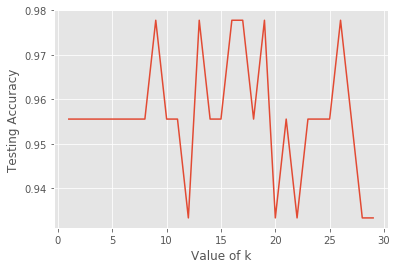

In [264]:
%matplotlib inline
import matplotlib.pyplot as plt

accuracy = []
for k in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, y_train)
    y_prediction = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_prediction))

# plot the relation between k and the testing accuracy

plt.plot(range(1, 30), accuracy)
plt.xlabel('Value of k')
plt.ylabel('Testing Accuracy')
    

### Making prediction on new data 

In [265]:
# according to the graph the best value for k is 9

knn = KNeighborsClassifier(n_neighbors= 9)

# train the model on the entire data
knn.fit(X,y)

#predict the response for unseen data
knn.predict([[7,3,6,2]])

array([2])